College Name              0
Designation               0
CGPA                      0
Speaking Skills           0
ML Knowledge              0
Years Since Graduation    0
dtype: int64
0
College Name              0
Designation               0
CGPA                      0
Speaking Skills           0
ML Knowledge              0
Years Since Graduation    0
dtype: int64
0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3796
           1       0.00      0.00      0.00         0

    accuracy                           0.96      3796
   macro avg       0.50      0.48      0.49      3796
weighted avg       1.00      0.96      0.98      3796

Confusion Matrix:
[[3628  168]
 [   0    0]]
Feature Importances:
College Name: 0.66
Designation: 0.14
CGPA: 0.02
Speaking Skills: 0.03
ML Knowledge: 0.03
Years Since Graduation: 0.12
Accuracy: 0.9557428872497366
Accuracy (%): 95.57428872497366
Code execution completed successfully!


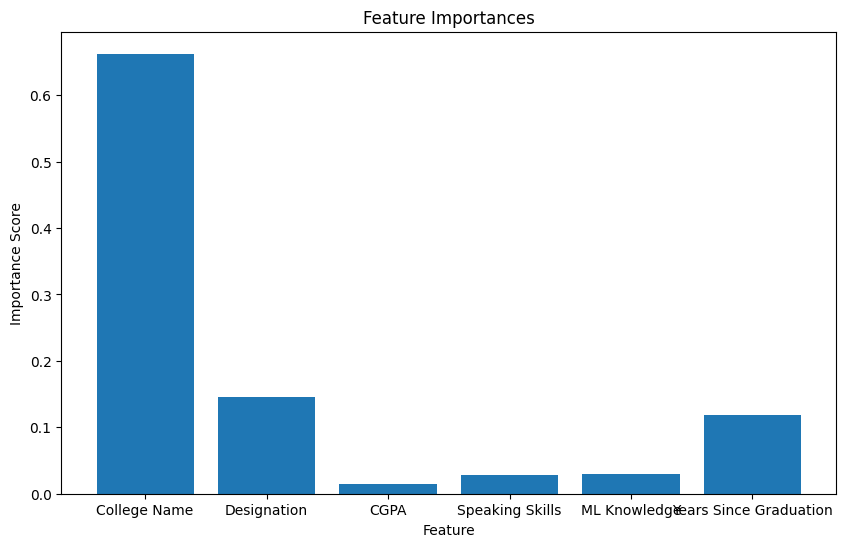

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load datasets
train_df = pd.read_csv('01 Train Data.csv')
test_df = pd.read_csv('02 Test Data.csv')

# Handle missing values
numeric_cols = ['CGPA', 'Speaking Skills', 'ML Knowledge']
imputer = SimpleImputer(strategy='mean')

# Fill missing values in numeric columns
train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])

# Fill missing values in other columns
train_df = train_df.fillna('')
test_df = test_df.fillna('')

# Preprocess categorical features
le_college_name = LabelEncoder()
le_designation = LabelEncoder()
le_placement_status = LabelEncoder()

train_df['College Name'] = le_college_name.fit_transform(train_df['College Name'])
test_df['College Name'] = le_college_name.transform(test_df['College Name'])
train_df['Designation'] = le_designation.fit_transform(train_df['Designation'])
test_df['Designation'] = le_designation.transform(test_df['Designation'])

# Combine 'Placement Status' columns
placement_statusCombined = pd.concat([train_df['Placement Status'], test_df['Placement Status']])

# Handle NaN in 'Placement Status'
placement_statusCombined = placement_statusCombined.fillna('Unknown')

# Fit LabelEncoder on combined column
le_placement_status.fit(placement_statusCombined)

# Transform 'Placement Status' columns
train_df['Placement Status'] = le_placement_status.transform(train_df['Placement Status'])
test_df['Placement Status'] = le_placement_status.transform(test_df['Placement Status'])

# Convert 'Year of Graduation' to numeric
train_df['Year of Graduation'] = pd.to_numeric(train_df['Year of Graduation'], errors='coerce')
test_df['Year of Graduation'] = pd.to_numeric(test_df['Year of Graduation'], errors='coerce')

# Handle missing values in 'Year of Graduation'
train_df['Year of Graduation'] = train_df['Year of Graduation'].fillna(train_df['Year of Graduation'].mean())
test_df['Year of Graduation'] = test_df['Year of Graduation'].fillna(test_df['Year of Graduation'].mean())

# Create new feature 'Years Since Graduation'
train_df['Years Since Graduation'] = 2024 - train_df['Year of Graduation']
test_df['Years Since Graduation'] = 2024 - test_df['Year of Graduation']

# Define features and target variables
features = ['College Name', 'Designation', 'CGPA', 'Speaking Skills', 'ML Knowledge', 'Years Since Graduation']
target_placement = 'Placement Status'

# Split data into training and testing sets
X_train_placement, X_test_placement, y_train_placement, y_test_placement = train_test_split(
    train_df[features],
    train_df[target_placement],
    test_size=0.2,
    random_state=42,
    stratify=train_df[target_placement]
)

# Check for missing values in training and test sets
print(X_train_placement.isnull().sum())
print(y_train_placement.isnull().sum())
print(X_test_placement.isnull().sum())
print(y_test_placement.isnull().sum())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_placement, y_train_placement)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_placement, y_train_placement)

# Make predictions
placement_predictions = best_model.predict(test_df[features])

# Transform predictions to show "not placed" or "placed"
placement_predictions = ['placed' if x == 1 else 'not placed' for x in placement_predictions]

# Save the predictions to a CSV file
output_df = test_df.copy()
output_df['Predicted Placement'] = placement_predictions
output_df.to_csv('placement_predictions.csv', index=False)

# Transform true labels to strings
true_labels = ['placed' if x == 1 else 'not placed' for x in test_df[target_placement]]

# Print the classification report
print("Classification Report:")
print(classification_report(test_df[target_placement], best_model.predict(test_df[features]), zero_division=0))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_df[target_placement], best_model.predict(test_df[features])))

# Feature importance
feature_importance = best_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.2f}")

accuracy = accuracy_score(test_df[target_placement], best_model.predict(test_df[features]))
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy (%):", accuracy_percentage)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.savefig('feature_importances_plot.png')

print("Code execution completed successfully!")

In [7]:
from google.colab import files

# Download the CSV file
files.download('placement_predictions.csv')

# Download the PNG file
files.download('feature_importances_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
data = pd.read_csv('Final Lead Data.csv')

# Convert the 'Created' column to datetime
data['Created'] = pd.to_datetime(data['Created'])

# Extract the year from the 'Created' column
data['Created Year'] = data['Created'].dt.year

# Handle missing values in the Academic Year column (Consider filling with a mode)
data['Academic Year'] = data['Academic Year'].fillna(data['Academic Year'].mode()[0])

# Preprocess categorical features
data['New College Name'] = LabelEncoder().fit_transform(data['New College Name'])
data['Branch/ Specialisation'] = LabelEncoder().fit_transform(data['Branch/ Specialisation'])

# Define the features (X) and target (y)
X = data[['New College Name', 'Academic Year', 'Branch/ Specialisation']]
y = data['Created Year'] + (4 - data['Academic Year'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]
}

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Use the best model to make predictions and round to nearest whole number
y_pred = grid_search.best_estimator_.predict(X_test).round().astype(int)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-Squared (R2): {r2:.2f}')

# Use the trained model to forecast graduation year for all data and round to nearest whole number
forecasted_graduation_year = grid_search.best_estimator_.predict(X).round().astype(int)

# Create a new DataFrame with all columns and the predicted graduation year
output_df = data.copy()
output_df['Forecasted Graduation Year'] = pd.Series(forecasted_graduation_year).fillna(0).astype(int)

# Ensure no forecasted year is zero by recalculating where necessary
output_df.loc[output_df['Forecasted Graduation Year'] == 0, 'Forecasted Graduation Year'] = (
    output_df['Created Year'] + (4 - output_df['Academic Year'])
)

# Verify the changes
print(output_df['Forecasted Graduation Year'])

# Write the output DataFrame to a CSV file
output_df.to_csv('predicted_graduation_year.csv', index=False)

<ipython-input-3-0bb54e7024e9>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created'] = pd.to_datetime(data['Created'])


Mean Squared Error (MSE): 0.29
Mean Absolute Error (MAE): 0.29
R-Squared (R2): 0.58
0       2021
1       2022
2       2021
3       2021
4       2023
        ... 
5298    2021
5299    2021
5300    2021
5301    2020
5302    2020
Name: Forecasted Graduation Year, Length: 5303, dtype: int64


In [4]:
from google.colab import files

# Download the CSV file
files.download('predicted_graduation_year.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>